## A)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
df = pd.read_csv('fifa_historic.csv')
df= pd.read_csv('fifa_historic.csv', skiprows=[0, 1, 2])

column_names=['Year', 'Country', 'City', 'Stage', 'Home_Team', 'Away_Team', 'Home_Score', 'Away_Score',
                'Outcome', 'Win_Conditions', 'Winning_Team', 'Losing_Team', 'Date', 'Month', 'DayOfWeek']

df.columns =column_names

#df = df.dropna()
df['Date'] =pd.to_datetime(df['Date'], format='%m/%d/%Y')
df

#I decided to keep the na values because we lose a signifcant amount of information and the graphs become inaccurate representations of the data.

,Year,Country,City,Stage,Home_Team,Away_Team,Home_Score,Away_Score,Outcome,Win_Conditions,Winning_Team,Losing_Team,Date,Month,DayOfWeek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,1930-07-13,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,1930-07-13,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,1930-07-14,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,1930-07-14,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,1930-07-15,Jul,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2018,Russia,Sochi,Quarterfinals,Russia,Croatia,2,2,A,Croatia won in penalties (4 - 3),Croatia,Russia,2018-07-07,Jul,Saturday
896,2018,Russia,Saint Petersburg,Semifinals,France,Belgium,1,0,H,NaN,France,Belgium,2018-07-10,Jul,Tuesday
897,2018,Russia,Moscow,Semifinals,Croatia,England,2,1,H,Croatia won in AET,Croatia,England,2018-07-11,Jul,Wednesday
898,2018,Russia,Saint Petersburg,Third place,Belgium,England,2,0,H,NaN,Belgium,England,2018-07-14,Jul,Saturday


C:\Users\smath\AppData\Local\Temp\ipykernel_20604\4183076799.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_goals_per_year = df.groupby('Year')['Home_Score', 'Away_Score'].mean().mean(axis=1)


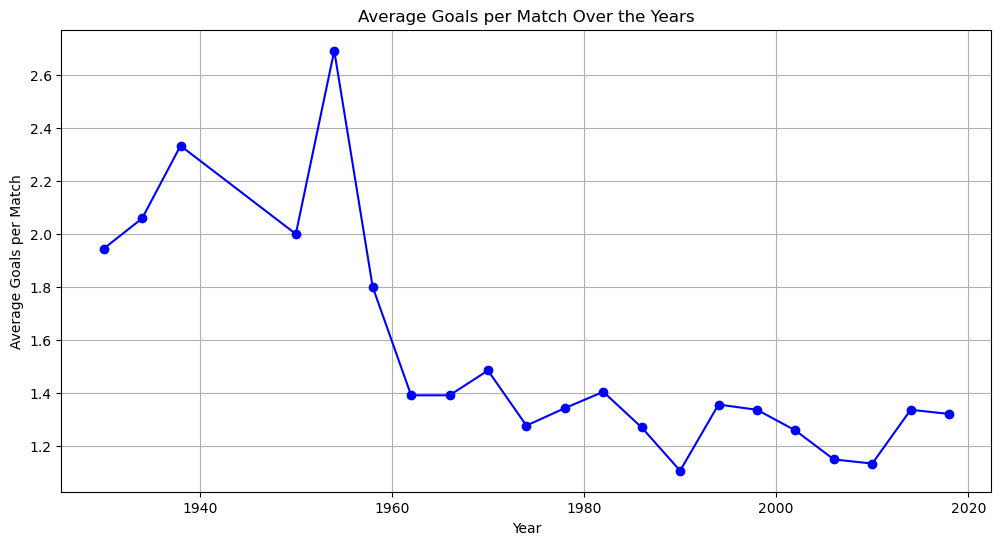

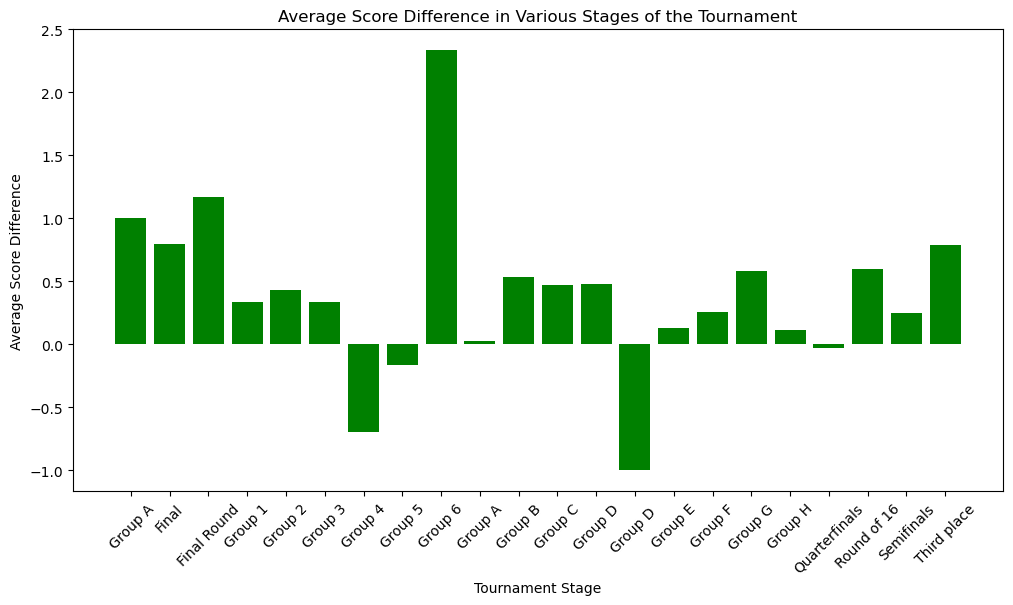

C:\Users\smath\AppData\Local\Temp\ipykernel_20604\4183076799.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_goals_by_stage =  df.groupby('Stage')['Home_Score', 'Away_Score'].mean().mean(axis=1)


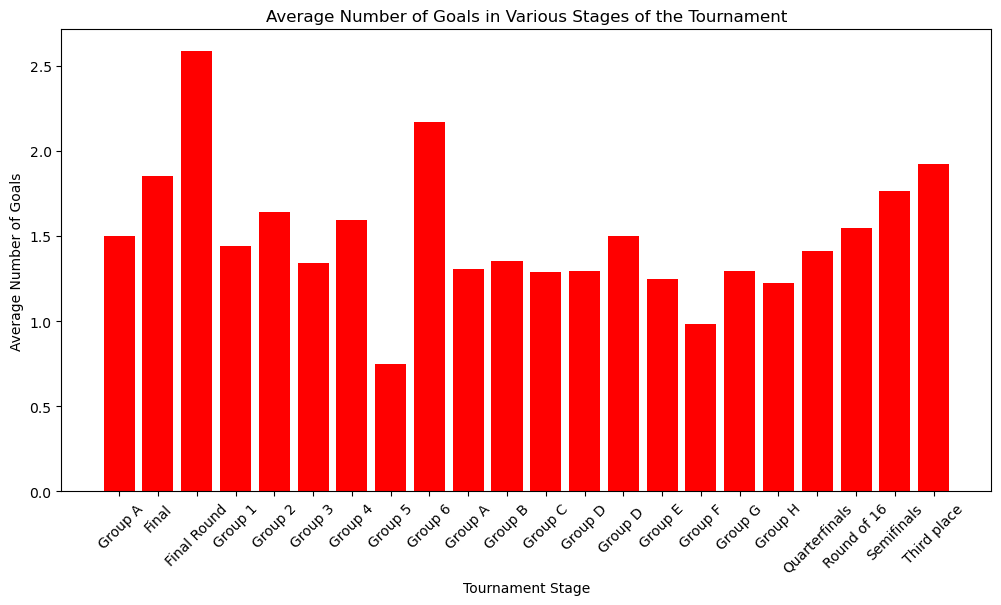

In [27]:
import matplotlib.pyplot as plt

average_goals_per_year = df.groupby('Year')['Home_Score', 'Away_Score'].mean().mean(axis=1)
plt.figure(figsize=(12, 6))
plt.plot(average_goals_per_year, marker='o', linestyle='-', color='b')
plt.title('Average Goals per Match Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Goals per Match')
plt.grid(True)
plt.show()


df['Score Difference']= df['Home_Score'] - df['Away_Score']
average_score_diff_by_stage = df.groupby('Stage')['Score Difference'].mean()
plt.figure(figsize=(12, 6))
plt.bar(average_score_diff_by_stage.index, average_score_diff_by_stage.values, color='g')
plt.title('Average Score Difference in Various Stages of the Tournament')
plt.xlabel('Tournament Stage')
plt.ylabel('Average Score Difference')
plt.xticks(rotation=45)
plt.show()

average_goals_by_stage =  df.groupby('Stage')['Home_Score', 'Away_Score'].mean().mean(axis=1)
plt.figure(figsize=(12, 6))
plt.bar(average_goals_by_stage.index,average_goals_by_stage.values, color='r')
plt.title('Average Number of Goals in Various Stages of the Tournament')
plt.xlabel('Tournament Stage')
plt.ylabel('Average Number of Goals')
plt.xticks(rotation=45)
plt.show()


According to the first graph, the average number of goals per match has declined over the years, from around 2-3 goals per match in the 1940s to 1960s to less than 1.5 after the 1960s. The second graph shows the average score difference between teams in various stages of the team. For the most part, the score difference is smaller as the tournament progresses, indicating that the teams are more evenly matched. The third graph shows that the average number of goals scored decreases as the tournament progresses. This also shows that the teams are more evenly matched because they are less likely to score a goal on each other.

## B)

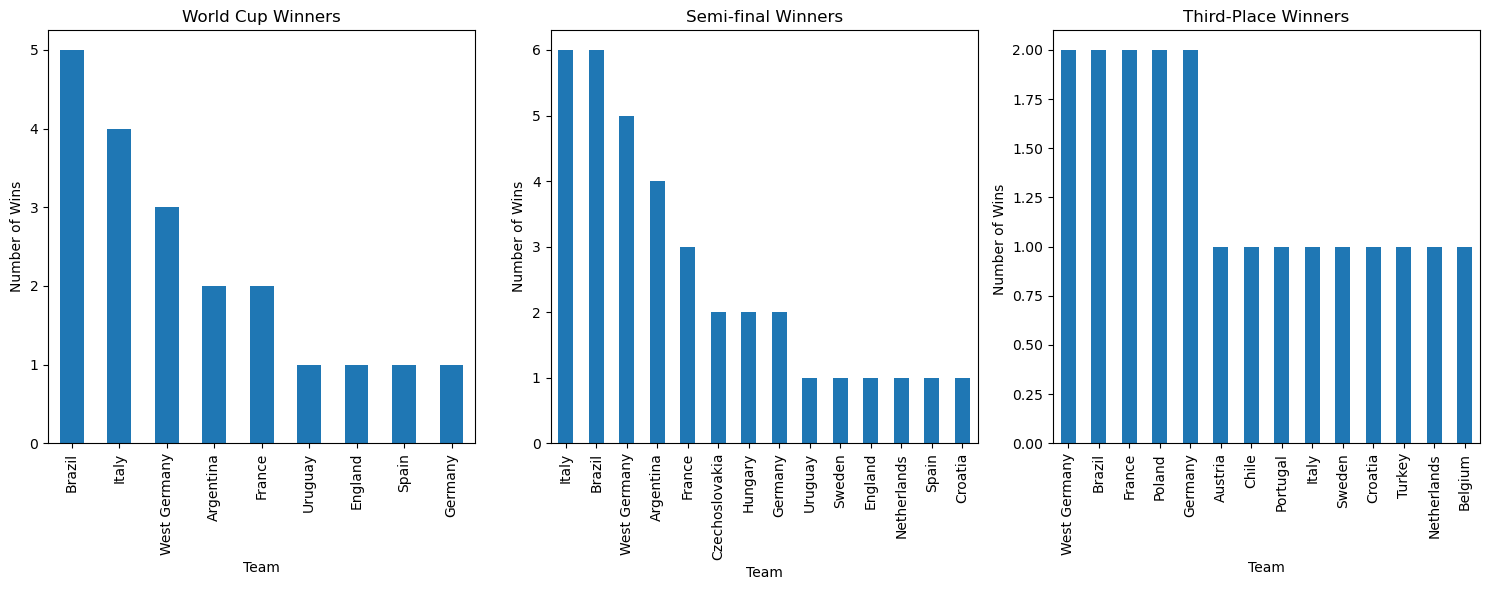

In [26]:
world_cup_finals = df[df['Stage'] == 'Final']
semi_finals = df[df['Stage'] == 'Semifinals']
third_place_matches = df[df['Stage'] == 'Third place']

world_cup_winners = world_cup_finals['Winning_Team'].value_counts()
semi_final_winners = semi_finals['Winning_Team'].value_counts()
third_place_winners = third_place_matches['Winning_Team'].value_counts()

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
world_cup_winners.plot(kind='bar')
plt.title('World Cup Winners')
plt.xlabel('Team')
plt.ylabel('Number of Wins' )

plt.subplot(1, 3,2)
semi_final_winners.plot(kind='bar')
plt.title('Semi-final Winners')
plt.xlabel('Team')
plt.ylabel('Number of Wins')

plt.subplot(1,  3, 3)
third_place_winners.plot(kind='bar')
plt.title('Third-Place Winners')
plt.xlabel('Team')
plt.ylabel('Number of Wins ')

plt.tight_layout()
plt.show()

According to the bar graphs above, it looks like Brazil won the most World Cup matches with a total of 5 wins. Italy and Brazil tied for most semi-final wins with a total of 6 wins. West Germany, Brazil, France, Poland, Germany all tied for most third-place wins for a total of 2.

## C)

In [7]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

players_df = pd.read_csv('All_Players .csv')
players_df

,Player,Overall Score,Potential Score,Market Value,Height,Weight,Age,Preferred Foot,Ball Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping
0,Lionel Messi,94,94,95500000,170,72,33,Left,96.5,32.000000,77.833333,90.666667,82.000000,86.875,10.8
1,Cristiano Ronaldo,93,93,58500000,187,83,35,Right,90.5,28.000000,76.666667,81.333333,85.000000,87.500,11.6
2,Neymar Jr,92,92,105500000,175,68,28,Right,95.5,31.333333,75.000000,85.000000,79.142857,83.750,11.8
3,Virgil van Dijk,91,92,90000000,193,92,29,Right,73.5,90.666667,77.333333,71.666667,74.857143,65.125,11.6
4,Jan Oblak,91,93,77500000,188,87,27,Right,21.0,19.000000,47.500000,32.000000,59.428571,18.500,87.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19396,Li Xuebo,46,54,30000,188,75,20,Right,10.0,9.666667,22.500000,16.333333,33.000000,12.250,46.4
19397,Cheng Hui,46,52,35000,178,70,23,Right,44.0,44.666667,43.500000,43.666667,58.000000,35.500,7.4
19398,Yang Lei,46,56,40000,186,65,20,Right,39.0,45.333333,38.666667,36.333333,60.285714,26.875,10.4
19399,Lee Jea Ho,46,54,45000,184,77,23,Right,42.5,44.666667,44.000000,49.000000,52.857143,34.500,10.0


In [8]:
predictors_1 = ['Overall Score', 'Potential Score', 'Height', 'Weight', 'Age']
predictors_2 = ['Ball Skills', 'Defence', 'Mental', 'Passing', 'Physical']
predictors_3 = ['Shooting', 'Goalkeeping']

target = 'Market Value'

cv = KFold(n_splits=10, random_state=1, shuffle=True)

model_1 =LinearRegression()
model_2 =LinearRegression()
model_3 = LinearRegression()

X_model_1 =  players_df[predictors_1]
X_model_2= players_df[predictors_2]
X_model_3 =players_df[predictors_3]
y = players_df[target]


scores_model_1 = cross_val_score(model_1, X_model_1, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_model_2= cross_val_score(model_2, X_model_2, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_model_3 =  cross_val_score(model_3, X_model_3, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

mae_model_1= np.mean(np.absolute(scores_model_1))
mae_model_2 = np.mean(np.absolute(scores_model_2))
mae_model_3 = np.mean(np.absolute(scores_model_3))
print(f"mae model 1: {mae_model_1}")
print(f"mae model 2: {mae_model_2}")
print(f"mae model 3: {mae_model_3}")

mae model 1: 2149383.019517824
mae model 2: 2491308.461034835
mae model 3: 2561423.002183323


I split the features in 3 different ways. The first model focussed on physical characteristics of the players, and the players' basic information. The second model focusses on individual skills of the player. The third model only includes shooting and goalkeeping because I feel like those are skills that are important to detemrining a player's overall ability to play on the field. Model 1 has the lowest mean absolute error out of the 3 models, indicating that it is the best at predicting market value of a player. Therefore, a player's basic information is the best indicator of market value. 

## D)

In [9]:
X_model_1_all = players_df[predictors_1]
y_all = players_df[target]

model_1.fit(X_model_1_all, y_all)
mbappe_data= pd.DataFrame([[89, 95, 178, 73, 21]], columns=predictors_1)

mbappe_market_value_prediction =model_1.predict(mbappe_data)

print(f"Predicted Market Value for Mbappe: {mbappe_market_value_prediction[0]}")

Predicted Market Value for Mbappe: 17636742.812888786


## E)

In [10]:
def predict_market_value(overall_score, potential_score, height, weight, age):
    X_model_1_all = players_df[predictors_1]
    y_all = players_df[target]

    model_1.fit(X_model_1_all, y_all)
    player_data = pd.DataFrame([[overall_score, potential_score, height, weight, age]], columns=predictors_1)

    market_value_prediction=model_1.predict(player_data)

    return market_value_prediction

print(predict_market_value(89, 95, 178, 73, 21))

[17636742.81288879]
